In [1]:
from decision_tree import DecisionTree
from validation import KFoldValidator
import matplotlib.pyplot as plt
from matplotlib import colormaps, colors
import numpy as np

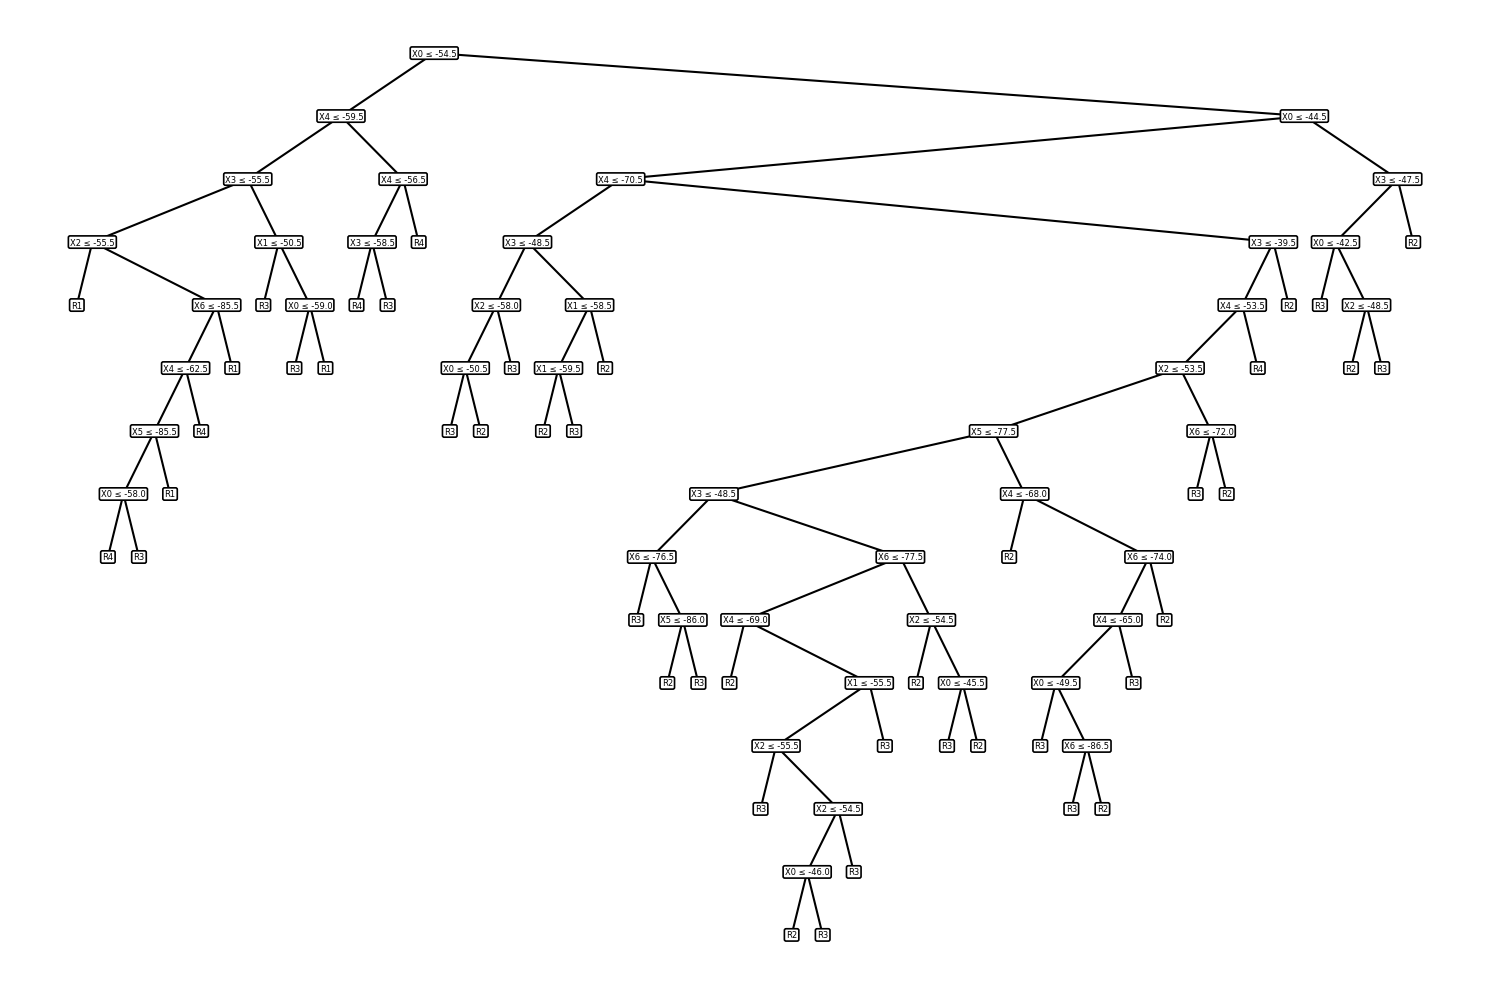

In [2]:
data = np.loadtxt('wifi_db/clean_dataset.txt')
data = data[np.random.default_rng(42).permutation(data.shape[0])]

model = DecisionTree(4)
model.tree, model.depth = model.decision_tree_learning(data, 0)
model.visualise_tree(figsize=(15, 10))

In [3]:
labels = ['Room 1', 'Room 2', 'Room 3', 'Room 4']
pale_blues = colors.LinearSegmentedColormap.from_list('pale_blues', colormaps.get_cmap('Blues')(np.linspace(0, 0.4, 256)))

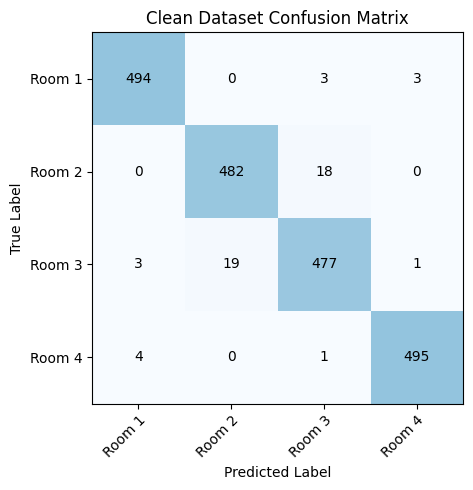

In [4]:
clean_validator = KFoldValidator('wifi_db/clean_dataset.txt', k=10)
clean_results = clean_validator.k_fold_validation()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(clean_results['confusion_matrix'], cmap=pale_blues)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, clean_results['confusion_matrix'][i, j], ha="center", va="center", color="black")

ax.set_title("Clean Dataset Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.tight_layout()
plt.show()


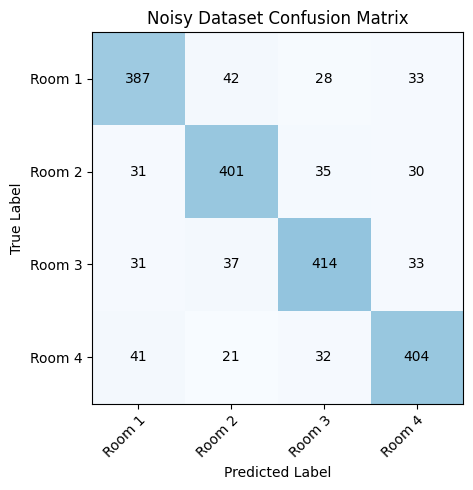

In [5]:
noisy_validator = KFoldValidator('wifi_db/noisy_dataset.txt', k=10)
noisy_results = noisy_validator.k_fold_validation()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(noisy_results['confusion_matrix'], cmap=pale_blues)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, noisy_results['confusion_matrix'][i, j], ha="center", va="center", color="black")

ax.set_title("Noisy Dataset Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.tight_layout()
plt.show()
